In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# img1 = cv2.imread("/content/drive/MyDrive/Normal _ Stroke Patient Details/Ellappan_Stroke_Ischemic/DWI/Ellappan DWI-18.jpg")
# img1 = cv2.imread("/content/drive/MyDrive/Normal _ Stroke Patient Details/Anbazhgan_Stroke_Ischemic/DWI/Anbazhagan DWI-24.jpg")
img1 = cv2.imread("/content/drive/MyDrive/Normal _ Stroke Patient Details/Amina_Stroke_Ischemic/DWI/Amina DWI-17.jpg")

(-0.5, 255.5, 255.5, -0.5)

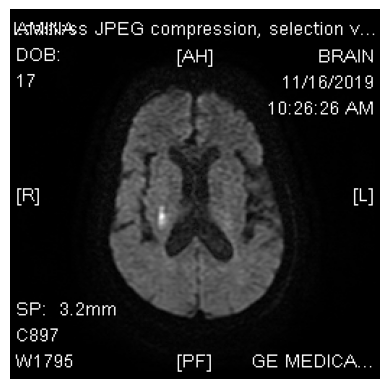

In [ ]:
plt.imshow(img1)
plt.axis("off")

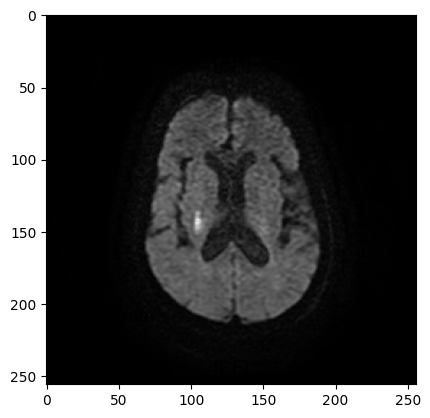

In [ ]:

mask = cv2.threshold(img1, 250, 255, cv2.THRESH_BINARY)[1][:,:,0]
dst = cv2.inpaint(img1, mask, 7, cv2.INPAINT_NS)
# dst = cv2.bitwise_not(dst)
plt.imshow(dst)


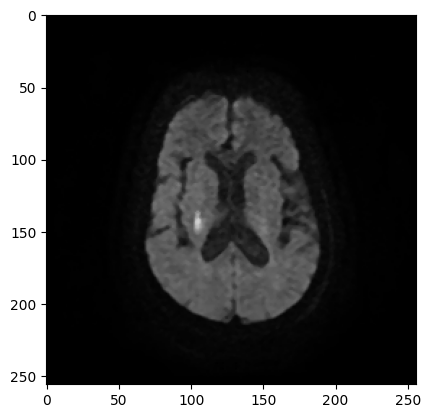

In [ ]:
from PIL import Image, ImageFilter


im1 = Image.fromarray(dst)
im1 = im1.filter(ImageFilter.MedianFilter(size = 3))
plt.imshow(im1)



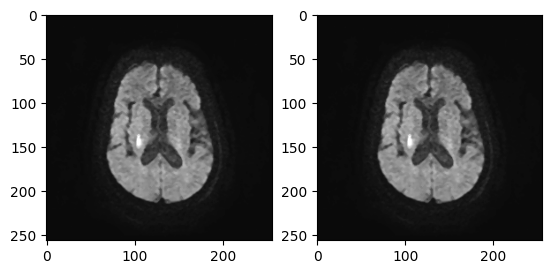

In [ ]:

ax = plt.subplots(1, 2)[1]
# plt.imshow(cv2.GaussianBlur(img_errode, (1, 1), 0))
img_bright = cv2.convertScaleAbs(np.asarray(im1), alpha=1.5, beta=10)
ax[0].imshow(img_bright)

kernel = np.ones((1, 1), np.uint8)
img_errode = cv2.erode(img_bright, kernel)

ax[1].imshow(img_errode)





True

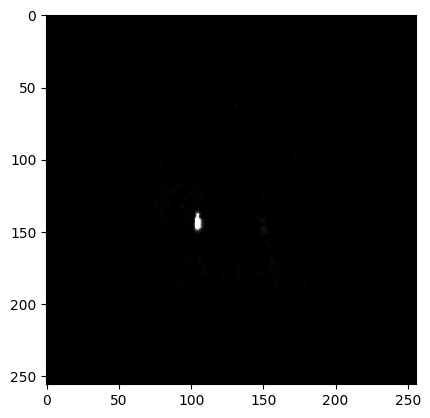

In [ ]:
def adjust_gamma(image, gamma=1.0):

   invGamma = 1.0 / gamma
   table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

   return cv2.LUT(image, table)

gamma = 0.1                                # change the value here to get different result
adjusted = adjust_gamma(img_errode, gamma=gamma)
plt.imshow(adjusted)
cv2.imwrite("adjusted.png", adjusted)

Text(0.5, 1.0, 'Segmented Stroke')

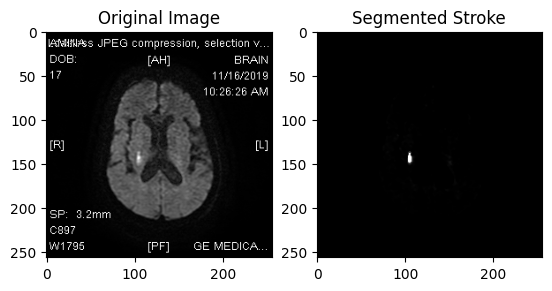

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img1)
ax[0].set_title("Original Image")

ax[1].imshow(adjusted)
ax[1].set_title("Segmented Stroke")
